In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [442]:
%matplotlib inline 

In [443]:
#import and clean data set
def read_auto_data(fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"):
    'Function to load the auto price data set from a .csv file' 
    import pandas as pd
    import numpy as np

    ## Read the .csv file with the pandas read_csv method
    auto_price = pd.read_csv(fileName, index_col=None)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_price.loc[auto_price[column] == '?', column] = np.nan
    auto_price.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_price[column] = pd.to_numeric(auto_price[column])
        
    return auto_price
auto_price = read_auto_data()

In [444]:
print(auto_price.shape)
print(auto_price.dtypes)

(195, 26)
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


In [445]:
auto_price.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [446]:
#create log price
auto_price['log_price'] = np.log(auto_price.price)

In [447]:
#rename columns
auto_price.rename(index=str, inplace=True, columns={"num-of-doors": "num_of_doors", "highway-mpg": "highway_mpg", "city-mpg":"city_mpg", "drive-wheels": "drive_wheels", "engine-location": "engine_location", "fuel-type":"fuel_type"})


### Identify a likely distribution for price and several other features

In [448]:
#create price and log_price lists
norm1 = auto_price.price.tolist()
norm2 = auto_price.log_price.tolist()
norm3 = auto_price.highway_mpg.tolist()
norm4 = auto_price.city_mpg.tolist()
norm5 = auto_price.horsepower.tolist()
norm6 = auto_price.stroke.tolist()

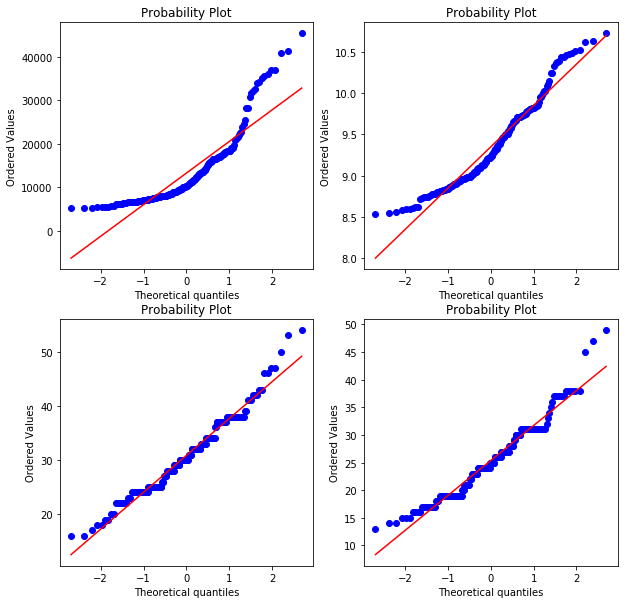

In [449]:
### Compare using Q-Q plot 
def qq_plot(vec1, vec2, vec3, vec4):
    plt.figure(figsize=(10, 10)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
    ax1 = plt.subplot(223) ## Set up the right subplot
    ss.probplot(vec3, plot = ax1) ## Plot the right subplot
    ax1 = plt.subplot(224) ## Set up the right subplot
    ss.probplot(vec4, plot = ax1) ## Plot the right subplot
qq_plot(norm1, norm2, norm3, norm4) 

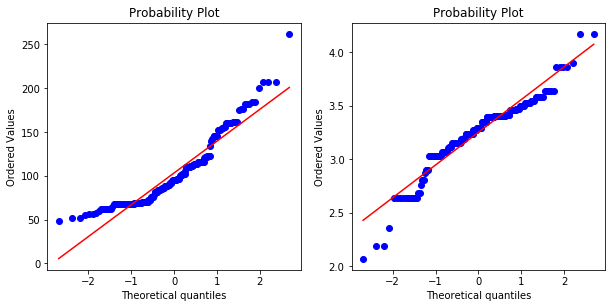

In [450]:
### Compare using Q-Q plot 
def qq_plot(vec5, vec6):
    plt.figure(figsize=(10, 10)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec5, plot = ax1) ## Plot the left subplot
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec6, plot = ax1) ## Plot the right subplot
qq_plot(norm5, norm6) 

Text(0.5,1,'Q-Q plot of two distributions')

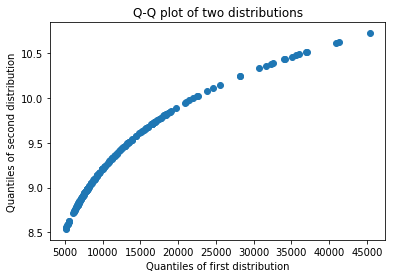

In [451]:
#Price and log-price
#test if two samples have similar distributions using the same plot
plt.scatter(x = sorted(norm1), y = sorted(norm2))
plt.xlabel('Quantiles of first distribution')
plt.ylabel('Quantiles of second distribution')
plt.title('Q-Q plot of two distributions')

Text(0.5,1,'Q-Q plot of two distributions')

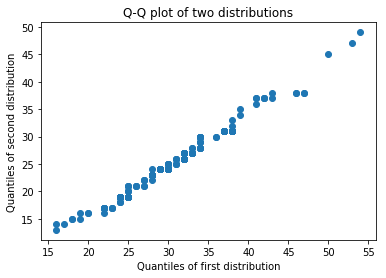

In [452]:
#highway and city mpg
#test if two samples have similar distributions using the same plot
plt.scatter(x = sorted(norm3), y = sorted(norm4))
plt.xlabel('Quantiles of first distribution')
plt.ylabel('Quantiles of second distribution')
plt.title('Q-Q plot of two distributions')

Text(0.5,1,'Q-Q plot of two distributions')

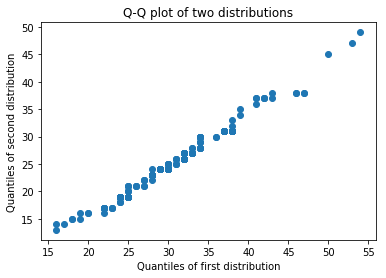

In [453]:
#horsepower and stroke
#test if two samples have similar distributions using the same plot
plt.scatter(x = sorted(norm3), y = sorted(norm4))
plt.xlabel('Quantiles of first distribution')
plt.ylabel('Quantiles of second distribution')
plt.title('Q-Q plot of two distributions')

### Kolmogorov-Smirnov Test for Distributions

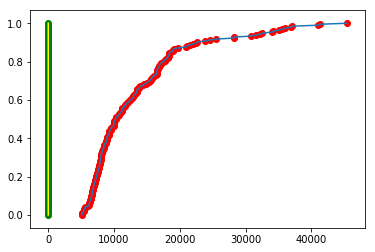

In [454]:
# plot the cumulative distribution functions of the two samples
def plot_cums(dist1, dist2):
    ## sort the first data sample:
    data_sorted = np.sort(dist1)
    
    # calculate the proportional values of samples
    p = 1. * np.arange(len(dist1)) / (len(dist1) - 1)

    # Now plot as line and scatter plot. 
    plt.plot(data_sorted, p)
    plt.scatter(data_sorted, p, color = 'red')
    
    # sort the seond data sample:
    data_sorted = np.sort(dist2)
    
    # And the second plot
    plt.plot(data_sorted, p, color = 'yellow')
    plt.scatter(data_sorted, p, color = 'green')

plot_cums(norm1, norm2)   

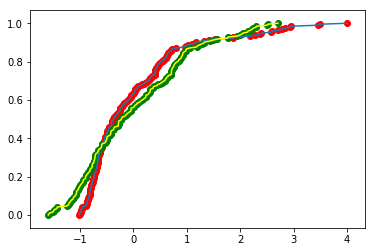

In [455]:
#Price and log-price
#standardize (zero mean, unit standard deviation) the two samples and plot the cumulative distribution function
from sklearn.preprocessing import scale
norm1_s = scale(norm1)
norm2_s = scale(norm2)
plot_cums(norm1_s, norm2_s)  

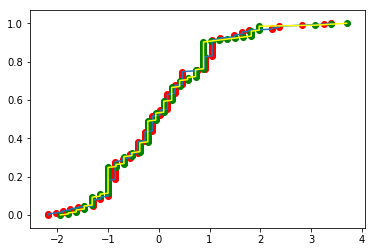

In [456]:
#highway and city mpg
#standardize (zero mean, unit standard deviation) the two samples and plot the cumulative distribution function
from sklearn.preprocessing import scale
norm3_s = scale(norm3)
norm4_s = scale(norm4)
plot_cums(norm3_s, norm4_s)  

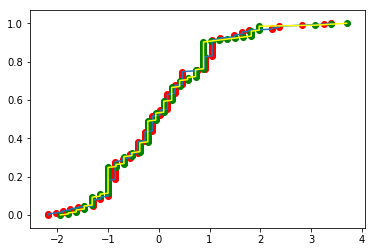

In [457]:
#horsepower and stroke
#standardize (zero mean, unit standard deviation) the two samples and plot the cumulative distribution function
from sklearn.preprocessing import scale
norm5_s = scale(norm3)
norm6_s = scale(norm4)
plot_cums(norm5_s, norm6_s)  

In [458]:
#compute the K-S statistic, maximum vertical distance between the two cumulative density functions, and the p-valu
def ks_test(dat, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic = ' + str(ks_statisic))
    print('P-value = ' + str(pvalue))
print('K-S Statistic Price')
ks_test(norm1_s)
print("\n")
print('K-S Statistic Log price')
ks_test(norm2_s)


K-S Statistic Price
KS-statistic = 0.15672300254932997
P-value = 0.00011937821625407352


K-S Statistic Log price
KS-statistic = 0.10295537216792472
P-value = 0.029757993611015943


In [459]:
print('K-S Statistic Highway MPG')
ks_test(norm3_s)
print("\n")
print('K-S Statistic City MPG')
ks_test(norm4_s) 

K-S Statistic Highway MPG
KS-statistic = 0.08646385006588647
P-value = 0.10210413526289153


K-S Statistic City MPG
KS-statistic = 0.0922252111664108
P-value = 0.06800967745477493


In [460]:
print('K-S Statistic Horsepower')
ks_test(norm5_s)
print("\n")
print('K-S Statistic Stroke')
ks_test(norm6_s) 

K-S Statistic Horsepower
KS-statistic = 0.08646385006588647
P-value = 0.10210413526289153


K-S Statistic Stroke
KS-statistic = 0.0922252111664108
P-value = 0.06800967745477493


### Confidence intervals

In [461]:
#understand mean and counts
def count_mean(dat):
    groups = dat.groupby('fuel_type') # Create the groups
    ## Create a data frame with the counts and the means of the groups
    return pd.DataFrame({'count': groups.size(), 
                        'mean': groups.aggregate(np.mean).loc[:, 'price']})
count_mean(auto_price)

,count,mean
fuel_type,,
diesel,20,15838.15
gas,175,12952.00


In [462]:
#test stratify
p = 0.05
def stratify(dat, p):
    groups = dat.groupby('fuel_type') # Create the groups
    nums = min(groups.size()) # Find the size of the smallest group
    num = int(p * dat.shape[0]) # Compute the desired number of samples per group
    if num <= nums: # If sufficient group size, sample each group and return. 
        return groups.apply(lambda x: x.sample(n=num))
    else: # Oops. p is to large
        pmax = nums / dat.shape[0]
        print('The maximum value of p = ' + str(pmax))
stratified = stratify(auto_price, p)
count_mean(stratified)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'fuel_type' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,count,mean
fuel_type,,
diesel,9,17436.666667
gas,9,9859.555556


In [463]:
#create histograms
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

In [464]:
#define t-test
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)

In [465]:
#assign values for fuel type 
diesel = auto_price.loc[auto_price.loc[:, 'fuel_type'] == 'diesel', 'price']
gas = auto_price.loc[auto_price.loc[:, 'fuel_type'] == 'gas', 'price']
twod = auto_price.loc[auto_price.loc[:, 'num_of_doors'] == 'two', 'price']
fourd = auto_price.loc[auto_price.loc[:, 'num_of_doors'] == 'four', 'price']
front = auto_price.loc[auto_price.loc[:, 'engine_location'] == 'front', 'price']
rear = auto_price.loc[auto_price.loc[:, 'engine_location'] == 'rear', 'price']


In [466]:
#define plot
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

DegFreedom      23.931783
Difference    2886.150000
Statistic        1.522895
PValue           0.129422
Low95CI       -909.857869
High95CI      6682.157869
dtype: float64


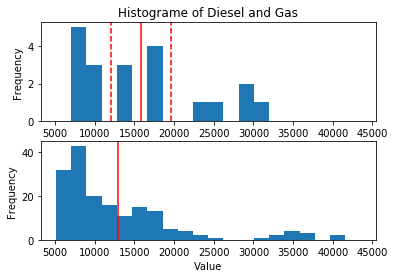

In [467]:
test_fuel = t_test(diesel, gas, alpha = 0.05)
print(test_fuel)
def plot_t_fuel(a, b, t_test, cols=['Diesel', 'Gas'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
plot_t_fuel(diesel, gas, test_fuel) 

DegFreedom     151.711720
Difference    -759.556658
Statistic       -0.642790
PValue           0.521131
Low95CI      -3166.779089
High95CI      1647.665773
dtype: float64


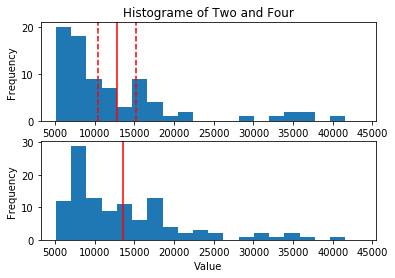

In [468]:
test_doors = t_test(twod, fourd, alpha = 0.05)
print(test_doors)
def plot_t_doors(a, b, t_test, cols=['Two', 'Four'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
plot_t_doors(twod, fourd, test_doors) 

DegFreedom        2.758205
Difference   -21612.484375
Statistic        -4.873501
PValue            0.000002
Low95CI      -26409.937440
High95CI     -16815.031310
dtype: float64


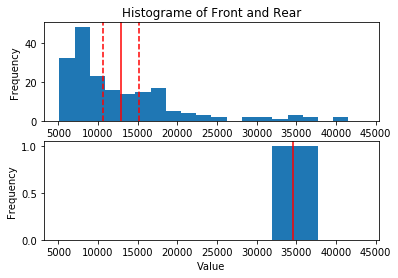

In [469]:
test_engloc = t_test(front, rear, alpha = 0.05)
print(test_engloc)
def plot_t_engloc(a, b, t_test, cols=['Front', 'Rear'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
plot_t_engloc(front, rear, test_drive)

### Bootstrap

In [470]:
diesel2 = auto_price[auto_price['fuel_type'] == 'diesel']
gas2 =  auto_price[auto_price['fuel_type'] == 'gas']
two2 = auto_price[auto_price['num_of_doors'] == 'two']
four2 =  auto_price[auto_price['num_of_doors'] == 'four']
front2 = auto_price[auto_price['engine_location'] == 'front']
rear2 =  auto_price[auto_price['engine_location'] == 'rear']

print(len(diesel2), len(gas2))
print(len(two2), len(four2))
print(len(front2), len(rear2))

20 175
81 112
192 3


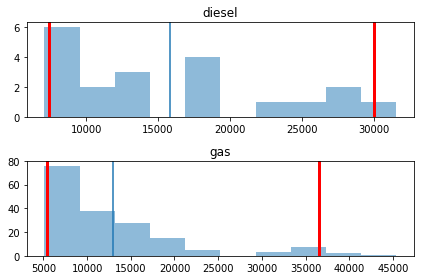

In [471]:
def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5)
    plt.axvline(x.mean())
    # 95% confidence interval    
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)
    
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pd.concat([a, b])
    breaks = np.linspace(
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    plt.subplot(2, 1, 1)
    plot_hist(a)
    plt.title(a_label)
    
    plt.subplot(2, 1, 2)
    plot_hist(b)
    plt.title(b_label)
    
    plt.tight_layout()
    

plot_dists(diesel2.price, gas2.price, 20, a_label='diesel', b_label='gas')

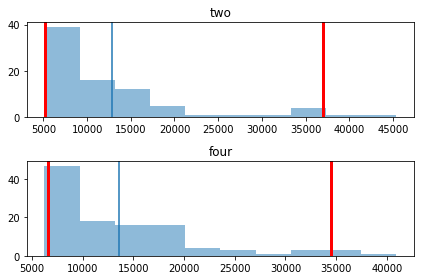

In [472]:
plot_dists(two2.price, four2.price, 20, a_label='two', b_label='four')

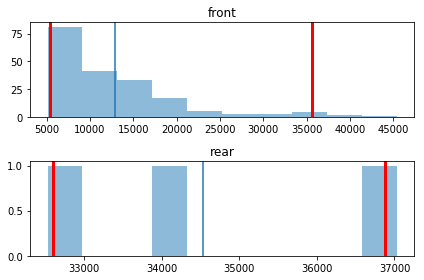

In [473]:
plot_dists(front2.price, rear2.price, 20, a_label='front', b_label='rear')

In [474]:
diesel2.sample(frac=1, replace=True).head()

,symboling,normalized-losses,make,fuel_type,aspiration,num_of_doors,body-style,drive_wheels,engine_location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city_mpg,highway_mpg,price,log_price
174,-1,65,toyota,diesel,turbo,four,sedan,fwd,front,102.4,...,idi,3.27,3.35,22.5,73,4500,30,33,10698,9.277812
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,idi,3.01,3.40,23.0,68,4500,33,38,13845,9.535679
112,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,idi,3.70,3.52,21.0,95,4150,28,33,16900,9.735069
184,2,94,volkswagen,diesel,std,four,sedan,fwd,front,97.3,...,idi,3.01,3.40,23.0,52,4800,37,46,7995,8.986572
90,1,128,nissan,diesel,std,two,sedan,fwd,front,94.5,...,idi,2.99,3.47,21.9,55,4800,45,50,7099,8.867709


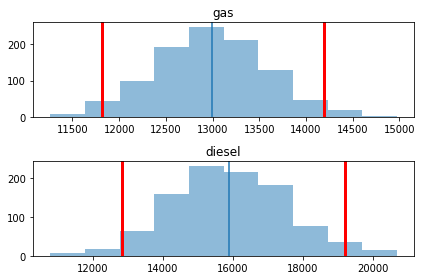

In [475]:
n_replicas = 1000

diesel_bootstrap_means = pd.Series([
    diesel2.sample(frac=1, replace=True).price.mean()
    for i in range(n_replicas)])

gas_bootstrap_means = pd.Series([
        gas2.sample(frac=1, replace=True).price.mean()
        for i in range(n_replicas)])

plot_dists(gas_bootstrap_means, diesel_bootstrap_means, 
           nbins=80, a_label='gas', b_label='diesel')

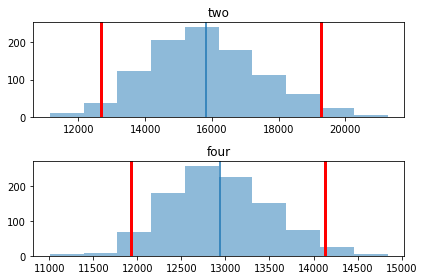

In [476]:
n_replicas = 1000

two_bootstrap_means = pd.Series([
    diesel2.sample(frac=1, replace=True).price.mean()
    for i in range(n_replicas)])

four_bootstrap_means = pd.Series([
        gas2.sample(frac=1, replace=True).price.mean()
        for i in range(n_replicas)])

plot_dists(two_bootstrap_means, four_bootstrap_means, 
           nbins=80, a_label='two', b_label='four')

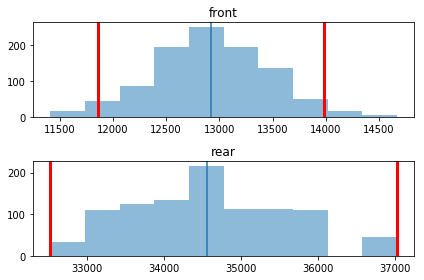

In [477]:
n_replicas = 1000

front_bootstrap_means = pd.Series([
    front2.sample(frac=1, replace=True).price.mean()
    for i in range(n_replicas)])

rear_bootstrap_means = pd.Series([
        rear2.sample(frac=1, replace=True).price.mean()
        for i in range(n_replicas)])

plot_dists(front_bootstrap_means, rear_bootstrap_means, 
           nbins=80, a_label='front', b_label='rear')

### Apply ANOVA and Tukey's HSD test to the auto price data 

Text(0.5,1,'Box plot by num of doors and engine location')

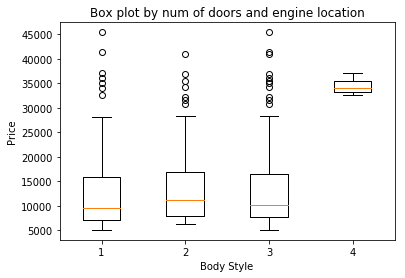

In [478]:
#assign body styles to variables
two = auto_price.loc[auto_price.loc[:, 'num_of_doors'] == 'two', 'price'].tolist()
four = auto_price.loc[auto_price.loc[:, 'num_of_doors'] == 'four', 'price'].tolist()
front = auto_price.loc[auto_price.loc[:, 'engine_location'] == 'front', 'price'].tolist()
rear = auto_price.loc[auto_price.loc[:, 'engine_location'] == 'rear', 'price'].tolist()

plt.boxplot([con, hback, front, rear])
plt.ylabel('Price')
plt.xlabel('Body Style')
plt.title('Box plot by num of doors and engine location')

In [479]:
f_statistic, p_value = ss.f_oneway(two, four) # fill in parameters
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 0.4131788841657639
P-value = 0.521131300440062


In [480]:
#get length of variables
print(len(two))
print(len(four))
print(len(front))
print(len(rear))

81
112
192
3


In [481]:
#Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df = pd.DataFrame({'vals': two + four + front + rear,
                   'group_num': ['1'] * 81 + ['2'] * 112 + ['3'] * 192 + ['4'] * 3})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1 group2  meandiff    lower      upper    reject
-----------------------------------------------------
  1      2     759.5567  -2200.2199 3719.3333  False 
  1      3     71.2687   -2617.2929 2759.8304  False 
  1      4    21683.7531 9752.9877  33614.5185  True 
  2      3    -688.2879  -3101.0193 1724.4434  False 
  2      4    20924.1964 9052.5465  32795.8463  True 
  3      4    21612.4844 9805.5306  33419.4382  True 
-----------------------------------------------------


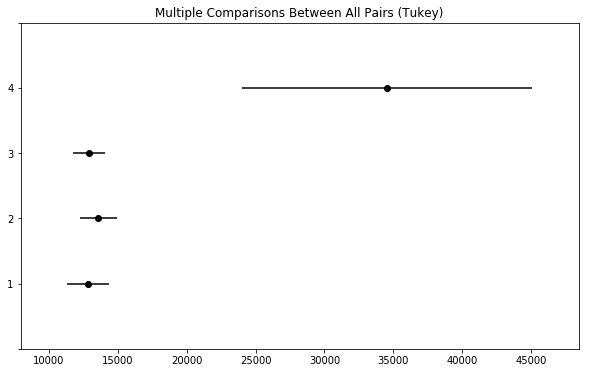

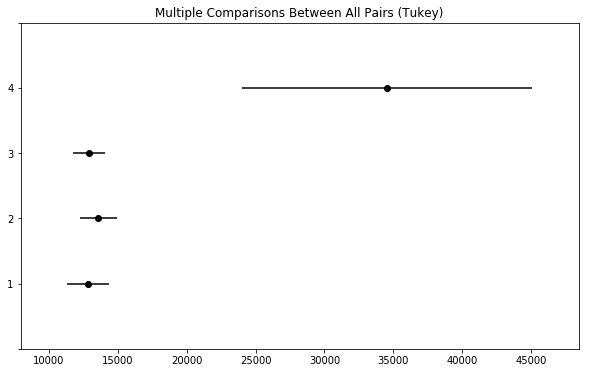

In [482]:
Tukey_HSD.plot_simultaneous()

### Additional category analysis

In [483]:
#understand data
auto_price['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', 'idi', 'spdi'], dtype=object)

In [484]:
#determine count and means
def count_mean_1(dat):
    groups = dat.groupby('fuel-system') # Create the groups
    ## Create a data frame with the counts and the means of the groups
    return pd.DataFrame({'count': groups.size(), 
                        'mean': groups.aggregate(np.mean).loc[:, 'price']})
count_mean_1(auto_price)

,count,mean
fuel-system,,
1bbl,11,7555.545455
2bbl,64,7433.203125
idi,20,15838.150000
mfi,1,12964.000000
mpfi,89,17807.168539
spdi,9,10990.444444
spfi,1,11048.000000


Text(0.5,1,'Box plot by fuel system')

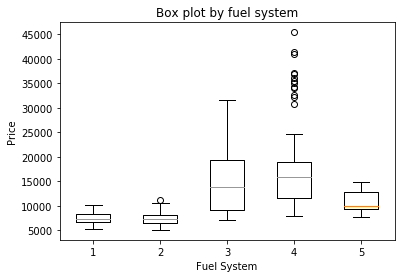

In [485]:
#assign variables, drop fuel system counts with only 1 value
onebbl = auto_price.loc[auto_price.loc[:, 'fuel-system'] == '1bbl', 'price'].tolist()
twobbl = auto_price.loc[auto_price.loc[:, 'fuel-system'] == '2bbl', 'price'].tolist()
idi = auto_price.loc[auto_price.loc[:, 'fuel-system'] == 'idi', 'price'].tolist()
mpfi = auto_price.loc[auto_price.loc[:, 'fuel-system'] == 'mpfi', 'price'].tolist()
spdi = auto_price.loc[auto_price.loc[:, 'fuel-system'] == 'spdi', 'price'].tolist()


plt.boxplot([onebbl, twobbl, idi, mpfi, spdi])
plt.ylabel('Price')
plt.xlabel('Fuel System')
plt.title('Box plot by fuel system')

In [486]:
f_statistic, p_value = ss.f_oneway(onebbl, twobbl, idi, mpfi, spdi) # fill in parameters
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 26.613227854152395
P-value = 1.687377774108041e-17


In [487]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df = pd.DataFrame({'vals': onebbl + twobbl + idi + mpfi + spdi,
                   'group_num': ['1'] * 11 + ['2'] * 64 + ['3'] * 20 + ['4'] * 89 + ['5'] * 9})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
group1 group2  meandiff     lower      upper    reject
------------------------------------------------------
  1      2    -122.3423   -6000.3678 5755.6831  False 
  1      3    8282.6045   1522.4493  15042.7598  True 
  1      4    10251.6231   4495.954  16007.2922  True 
  1      5     3434.899   -4659.4992 11529.2971 False 
  2      3    8404.9469   3791.5393  13018.3544  True 
  2      4    10373.9654  7422.4308  13325.5001  True 
  2      5    3557.2413   -2853.9295 9968.4122  False 
  3      4    1969.0185   -2487.4455 6425.4826  False 
  3      5    -4847.7056 -12076.2342 2380.8231  False 
  4      5    -6816.7241  -13115.903 -517.5452   True 
------------------------------------------------------


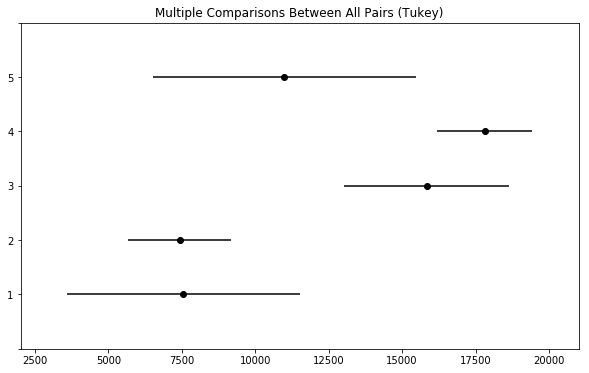

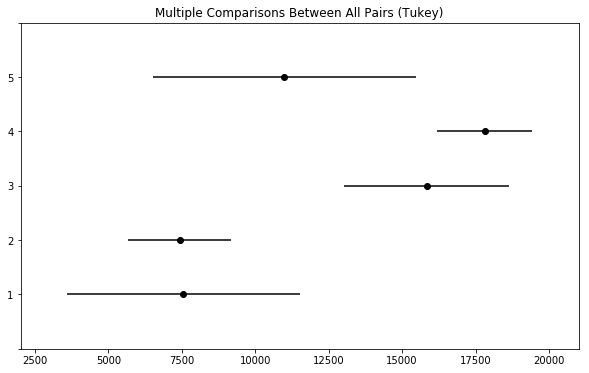

In [488]:
Tukey_HSD.plot_simultaneous()

Mean of mpg: 26.0


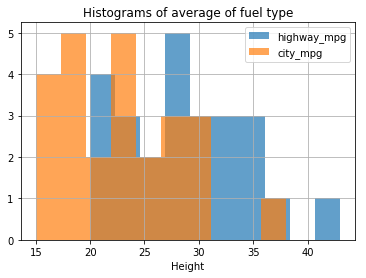

In [489]:
num_samples = 25
gas = auto_price[auto_price.fuel_type == 'gas'].sample(n=num_samples)

plt.title('Histograms of average of fuel type')
gas.highway_mpg.hist(label='highway_mpg', bins=10, alpha=.7)
gas.city_mpg.hist(label='city_mpg', bins=10, alpha=.7)
plt.xlabel('Height')
plt.legend()

mean_mpg = np.concatenate([gas.highway_mpg, gas.city_mpg,]).mean()
print('Mean of mpg: %.1f' % mean_mpg)

Mean = 28.760, Standard deviation = 5.384


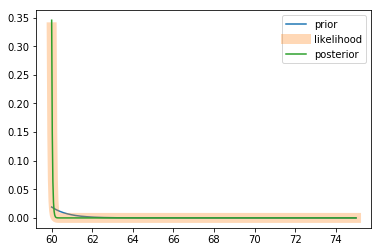

In [490]:
N = 1000
p = np.linspace(60, 75, num=N)

pp = ss.norm.pdf(p, loc=gas.highway_mpg.mean(), scale=5)
pp = pp / pp.sum() # normalize

def comp_like(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()

def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

like_son = comp_like(p, gas.highway_mpg)
post_son = posterior(pp, like_son)

plt.plot(p, pp, label='prior')
plt.plot(p, like_son, label='likelihood', alpha=.3, linewidth=10)
plt.plot(p, post_son, label='posterior')
plt.legend()

Mean = 23.160, Standard deviation = 5.379


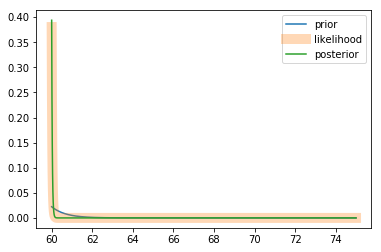

In [491]:
pp_city = ss.norm.pdf(p, loc=gas.city_mpg.mean(), scale=5)
pp_city = pp_city / pp_city.sum() # normalize

like_city = comp_like(p, gas.city_mpg)
post_city = posterior(pp_city, like_city)

plt.plot(p, pp_city, label='prior')
plt.plot(p, like_city, label='likelihood', alpha=.3, linewidth=10)
plt.plot(p, post_city, label='posterior')
plt.legend()